In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df =pd.read_csv(r"E:\Greens\python\Student_Marks.csv")
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [59]:
print(df.isnull().sum())

number_courses    0
time_study        0
Marks             0
dtype: int64


In [61]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [63]:
df['number_courses'].value_counts()

number_courses
3    22
4    21
6    16
8    16
7    15
5    10
Name: count, dtype: int64

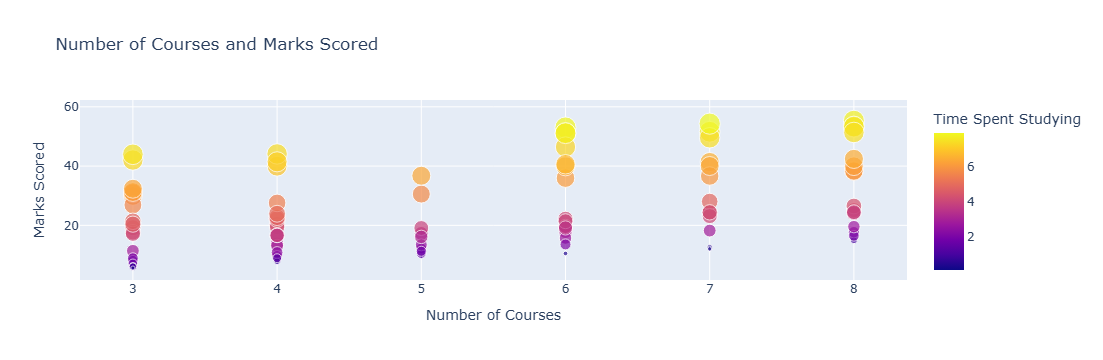

In [187]:
import plotly.express as px

figure = px.scatter(
    data_frame=df, 
    x="number_courses", 
    y="Marks", 
    size="time_study", 
    color="time_study",  # Coloring by 'time_study' to provide more insights
    title="Number of Courses and Marks Scored",
    labels={"number_courses": "Number of Courses", "Marks": "Marks Scored", "time_study": "Time Spent Studying"},  # Custom axis labels
    hover_data=["time_study"],  # Show additional data on hover
    size_max=15,  # Limit the maximum size of bubbles for better readability
)


figure.show()



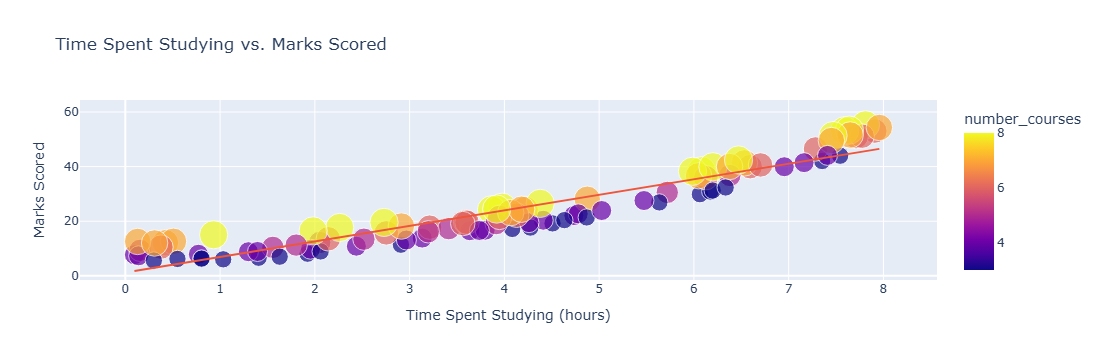

In [185]:
figure = px.scatter(
    data_frame=df, 
    x="time_study", 
    y="Marks", 
    size="number_courses", 
    color="number_courses",  # Color based on the number of courses for additional insight
    title="Time Spent Studying vs. Marks Scored",
    trendline="ols",  # Add an Ordinary Least Squares (OLS) trendline
    labels={"time_study": "Time Spent Studying (hours)", "Marks": "Marks Scored"},  # Custom axis labels
    hover_data=["number_courses"]  # Show additional data on hover
)

# Show the plot
figure.show()


## Find the correlation


In [91]:
correlation = df.corr()
correlation["Marks"].sort_values(ascending=False)

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64

## Student Marks Prediction Model

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x = df.iloc[:,:1].values # features
y = df.iloc[:,1].values # target
y


array([4.508, 0.096, 3.133, 7.909, 7.811, 3.211, 6.063, 3.413, 4.41 ,
       6.173, 7.353, 0.423, 4.218, 4.274, 2.908, 4.26 , 5.719, 6.08 ,
       7.711, 3.977, 4.733, 6.126, 2.051, 4.875, 3.635, 1.407, 0.508,
       4.378, 0.156, 1.299, 3.864, 1.923, 0.932, 6.594, 4.083, 7.543,
       2.966, 7.283, 6.533, 7.775, 0.14 , 2.754, 3.591, 1.557, 1.954,
       2.061, 3.797, 4.779, 5.635, 3.913, 6.703, 4.13 , 0.771, 6.049,
       7.591, 2.913, 7.641, 7.649, 6.198, 7.468, 0.376, 2.438, 3.606,
       4.869, 0.13 , 2.142, 5.473, 0.55 , 1.395, 3.948, 3.736, 2.518,
       4.633, 1.629, 6.954, 0.803, 6.379, 5.985, 7.451, 0.805, 7.957,
       2.262, 7.41 , 3.197, 1.982, 6.201, 4.067, 1.033, 1.803, 6.376,
       4.182, 2.73 , 5.027, 6.471, 3.919, 3.561, 0.301, 7.163, 0.309,
       6.335])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [171]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


-0.056872547298711496

 ## Predict the marks of student

In [175]:
y_pred = model.predict(X_test)
y_pred

array([3.83948422, 4.18408063, 3.66718602, 3.49488781, 3.66718602,
       4.01178243, 3.83948422, 4.18408063, 3.49488781, 3.49488781,
       4.01178243, 4.35637883, 3.49488781, 4.01178243, 4.18408063,
       4.35637883, 3.83948422, 4.35637883, 4.18408063, 3.49488781])

In [177]:
y_test

array([3.197, 6.049, 3.736, 2.061, 1.954, 7.775, 2.051, 7.957, 7.353,
       4.508, 7.711, 3.864, 1.629, 6.594, 4.182, 7.811, 6.379, 5.985,
       4.218, 1.923])

In [179]:
model.coef_, model.intercept_

(array([0.1722982]), 2.9779931992758946)

In [159]:
print(len(X_test), len(y_test), len(y_pred))


20 20 20


In [181]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

Shape of X_test: (20, 1)
Length of y_test: 20
Length of y_pred: 20


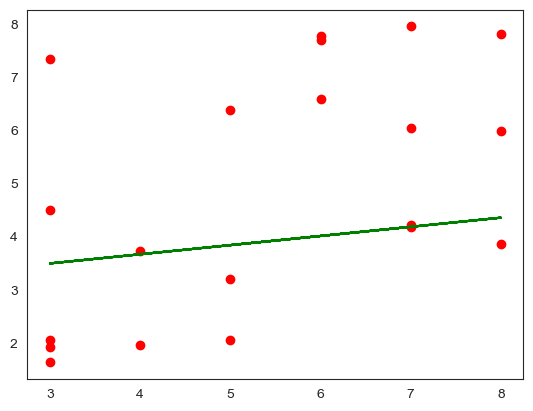

In [183]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, y_pred, color='g')